In [1]:
import math
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [2]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [3]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': r"\usepackage{amsmath}"})

In [4]:
# downloading numerical results:
# see ../numerics

rhos = np.logspace(-4.5, 4.5, int(1e2))

with open('../numerics/lambda_rho_neutral.txt') as f:
    lambda_rho_neutral = dict([list(map(float, x.split())) for x in f.readlines()[1:]])

In [5]:
# downloading simulation results
# see ../simulations

N = 1e6
s = [1e-4, 1e-3, 1e-2]

points = {}
for regime in ['r_mu=1e-10', 'r_mu=1e-9', 'r_mu=1e-8', 'r_sel_AB=1e-2_mu=1e-10', 'r_sel_AB=1e-2_mu=1e-9', 'r_sel_AB=1e-2_mu=1e-8', 'r_sel_AB=1e-3_mu=1e-10', 'r_sel_AB=1e-3_mu=1e-9', 'r_sel_AB=1e-3_mu=1e-8', 'r_sel_AB=1e-4_mu=1e-10', 'r_sel_AB=1e-4_mu=1e-9', 'r_sel_AB=1e-4_mu=1e-8']:
    
    points[regime] = {}
    points[regime]['fs'] = np.load('../simulations/out/%s_fstars.npy' % regime)
    points[regime]['rs'] = np.load('../simulations/out/%s_rs.npy' % regime)
    points[regime]['nums'] = np.load('../simulations/out/%s_numers.npy' % regime)
    points[regime]['denoms'] = np.load('../simulations/out/%s_denoms.npy' % regime)
    

In [6]:
# strong sel result
# see strong selection/recombination appendix in the paper

def lambda_bar(rho, gamma_a, gamma_b, gamma_ab):
    return rho/(rho+gamma_a+gamma_b+gamma_ab) * (1 + 
                                                 gamma_a*(rho+gamma_a)/((rho+gamma_b+gamma_ab)*(rho+gamma_b/2+gamma_ab)) + 
                                                 gamma_b*(rho+gamma_b)/((rho+gamma_a+gamma_ab)*(rho+gamma_a/2+gamma_ab)) +
                                                 4*rho*gamma_a*gamma_b*(rho+gamma_a+gamma_b)*(rho+gamma_a/2+gamma_b/2+gamma_ab)/((rho+gamma_a+gamma_ab)*(rho+gamma_b+gamma_ab)*(rho+gamma_ab)**3))


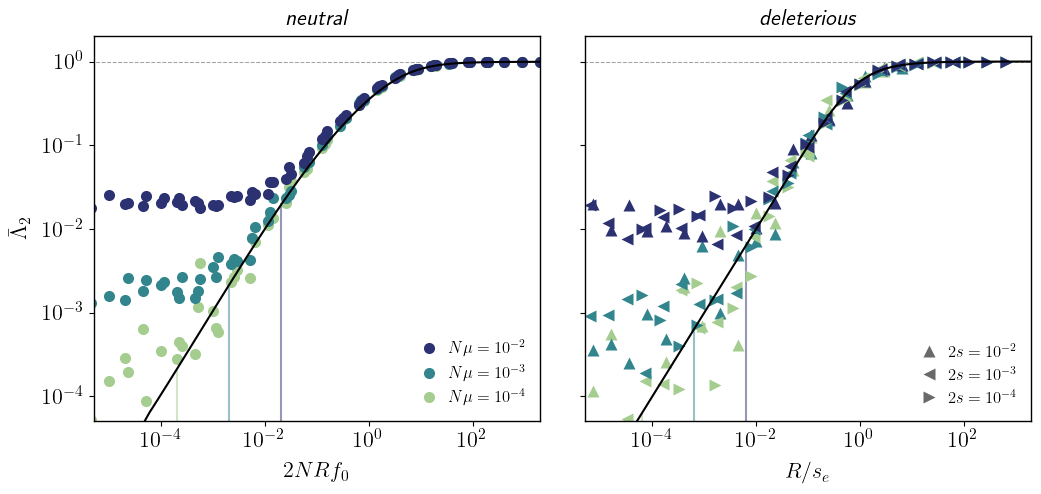

In [7]:
matplotlib.rcParams['axes.linewidth'] = 1

fig = plt.figure(figsize=(12.1, 5))

grid = gridspec.GridSpec(ncols=2, nrows=1,
                         width_ratios=[1, 1], wspace=0.1,
                         height_ratios=[1], hspace=0.1)

cmap = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=-10, vmax=-8),cmap=sns.color_palette("crest", as_cmap=True))
grey = '#a1a1a1' 
dark_grey = '#696969'
w = 1.5 # linewidth

for c in range(2):
    
    plt.subplot(grid[c // 2, c % 2])
    

    if c == 0: # neutral
        
        # numerical solution
        plt.plot(rhos, [lambda_rho_neutral[x] for x in rhos], color='#000000', linewidth=w, zorder=5)
        
        # line at 1
        plt.loglog(np.logspace(-6,8,25), np.ones_like(np.logspace(-6,8,25)), '--', color=grey, linewidth=w/2, zorder=-1)
        
        # regime boundaries
        plt.loglog([2 * N * 1e-10, 2 * N * 1e-10], [1e-10, 2 * N * 1e-10], 
                   color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-10))), alpha=0.5, zorder=-1, linewidth=w)
        
        plt.loglog([2 * N * 1e-9, 2 * N * 1e-9], [1e-9, 2 * N * 1e-9], 
                   color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-9))), alpha=0.5, zorder=-1, linewidth=w)
        
        plt.loglog([2 * N * 1e-8, 2 * N * 1e-8], [1e-8, 2 * N * 1e-8], 
                   color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-8))), alpha=0.5, zorder=-1, linewidth=w)

        
        # adding data
        regime = 'r_mu=1e-10'; mu = 1e-10
        color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(mu)))
        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f not in [1e-2, 1e-3, 1e-4]:
                continue
    
            xs = []; ys = []  
            for i, r in enumerate(points[regime]['rs']):  
                xs.append(2 * N * r * f)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        
            plt.loglog(xs, ys, 'o', markersize=8, markeredgecolor='#00000000', markerfacecolor=color) 

        regime = 'r_mu=1e-9'; mu = 1e-9
        color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(mu)))
        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f not in [1e-2, 1e-3, 1e-4]:
                continue
    
            xs = []; ys = []  
            for i, r in enumerate(points[regime]['rs']):  
                xs.append(2 * N * r * f)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        
            plt.loglog(xs, ys, 'o', markersize=8, markeredgecolor='#00000000', markerfacecolor=color) 
 
        regime = 'r_mu=1e-8'; mu = 1e-8
        color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(mu)))
        for j, f in enumerate(points[regime]['fs'][:-7]):
            if f not in [1e-2, 1e-3, 1e-4]:
                continue
    
            xs = []; ys = []  
            for i, r in enumerate(points[regime]['rs']):   
                xs.append(2 * N * r * f)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])
        
            plt.loglog(xs, ys, 'o', markersize=8, markeredgecolor='#00000000', markerfacecolor=color) 
         
        # this is for the legend
        plt.loglog(1e-8, 1e-8, 'o', markersize=8, markeredgecolor='#00000000', markerfacecolor=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-8))), label=r'$N\mu=10^{-2}$') 
        plt.loglog(1e-8, 1e-8, 'o', markersize=8, markeredgecolor='#00000000', markerfacecolor=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-9))), label=r'$N\mu=10^{-3}$')
        plt.loglog(1e-8, 1e-8, 'o', markersize=8, markeredgecolor='#00000000', markerfacecolor=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-10))), label=r'$N\mu=10^{-4}$')

    
        plt.xticks([1e-4, 1e-2, 1e0, 1e2, 1e4], 
                   ['$10^{-4}$', '$10^{-2}$', '$10^{0}$', '$10^{2}$', '$10^{4}$'])
        plt.yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
                   ['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
        plt.ylim([5e-5, 2])
        plt.xlim([5e-6, 2e3])

        plt.minorticks_off()
        plt.tick_params(axis='both', labelsize=16)

        plt.ylabel("$\\bar{\\Lambda}_2$", fontsize=16, labelpad=8)
        plt.xlabel(r"$2NRf_0$", fontsize=16, labelpad=8)   
        plt.title(r"$\text{\emph{neutral}}$", fontsize=16, pad=8)
        
        plt.legend(frameon=False, fontsize=12, loc='lower right', bbox_to_anchor=(0.5, 0.0, 0.5, 0.5), handletextpad=0.1);

        
        
    if c == 1: # deleterious
        
        # 19/60 R/(2s) is the x axis
        # the perturbation expansion breaks down at (NR)/(Ns)^2 ~ (Nm)/(Ns) or R/s ~ Nm or 19/60 R/(2s) ~ 19/30 Nm
        
        rhos_sel = np.logspace(-4.5, 8.5, int(1e2)) # 2NRf_0
        nrs_sel = np.logspace(-3.5, 9.5, int(1e2))# 2NR

        # if f_0 = 0.1 and N = 1e6, this means s = 1e-2
        gamma_a = 1000; gamma_b = 1000; eps = 0; gamma_ab = gamma_a + gamma_b + eps
        
        # line at 1
        plt.loglog(np.logspace(-6.5,5,25), np.ones_like(np.logspace(-6.5,5,25)), '--', color=grey, linewidth=w/2)
        
        # strong selection result
        plt.plot([19 / 30 * x / gamma_ab for x in np.logspace(-4.5, 8, int(1e2))], [lambda_bar(x, gamma_a, gamma_b, gamma_ab) for x in np.logspace(-4.5, 8, int(1e2))], color='black', linewidth=w, zorder=5) # label='numerics'

        # regime boundaries
        plt.loglog([19 / 30 * N * 1e-10, 19 / 30 * N * 1e-10], [1e-10, 19 / 30 * N * 1e-10],
                   color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-10))), alpha=0.5, zorder=-1, linewidth=w)
        
        plt.loglog([19 / 30 * N * 1e-9, 19 / 30 * N * 1e-9], [1e-9, 19 / 30 * N * 1e-9], 
                   color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-9))), alpha=0.5, zorder=-1, linewidth=w)
        
        plt.loglog([19 / 30 * N * 1e-8, 19 / 30 * N * 1e-8], [1e-8, 19 / 30 * N * 1e-8], 
                   color=matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(1e-8))), alpha=0.5, zorder=-1, linewidth=w)

        
        # this is for the legend
        plt.loglog([1e-5], [1e-5], '^', markersize=8, markeredgecolor='#00000000', markerfacecolor=dark_grey, label="$2s = 10^{-2}$")
        plt.loglog([1e-5], [1e-5], '<', markersize=8, markeredgecolor='#00000000', markerfacecolor=dark_grey, label="$2s = 10^{-3}$")
        plt.loglog([1e-5], [1e-5], '>', markersize=8, markeredgecolor='#00000000', markerfacecolor=dark_grey, label="$2s = 10^{-4}$")

            
        for regime in ['r_sel_AB=1e-2_mu=1e-10', 'r_sel_AB=1e-2_mu=1e-9', 'r_sel_AB=1e-2_mu=1e-8', 'r_sel_AB=1e-3_mu=1e-10', 'r_sel_AB=1e-3_mu=1e-9', 'r_sel_AB=1e-3_mu=1e-8', 'r_sel_AB=1e-4_mu=1e-10', 'r_sel_AB=1e-4_mu=1e-9', 'r_sel_AB=1e-4_mu=1e-8']:
            mu = float(regime.split('_')[-1].split('=')[-1])
            s = float(regime.split('_')[-2].split('=')[-1]) / 2
            color = matplotlib.colors.rgb2hex(cmap.to_rgba(math.log10(mu)))
            markers = {1e-2: '^', 1e-3: '<', 1e-4: '>'}
            
            for j, f in enumerate(points[regime]['fs']):
                if N * s * f < 10: # making sure that we are in the strong selection regime
                    continue
                if f not in [1e-1, 1e-2, 1e-3]:
                    continue
    
            xs = []; ys = []  
            for i, r in enumerate(points[regime]['rs']):  
                xs.append(19 / 60 * r / s)
                ys.append(points[regime]['nums'][i, j] / points[regime]['denoms'][i, j])

            plt.loglog(xs, ys, markers[s * 2], markersize=8, markeredgecolor='#00000000', markerfacecolor=color) 

        
        
        plt.xticks([1e-4, 1e-2, 1e0, 1e2, 1e4], 
                   ['$10^{-4}$', '$10^{-2}$', '$10^{0}$', '$10^{2}$', '$10^{4}$'])
        plt.yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
                   [])
        plt.ylim([5e-5, 2])
        plt.xlim([5e-6, 2e3])

        plt.minorticks_off()
        plt.tick_params(axis='both', labelsize=16)

        plt.xlabel(r"$R / s_e$", fontsize=16, labelpad=8)  
        plt.title(r"$\text{\emph{deleterious}}$", fontsize=16, pad=8)
        
        plt.legend(frameon=False, fontsize=12, loc='lower right', bbox_to_anchor=(0.5, 0.0, 0.5, 0.5), handletextpad=0.1);


plt.savefig('fig5.pdf',dpi=600,bbox_inches='tight') 